<a href="https://colab.research.google.com/github/nathanielvasserman/nathanielvasserman.github.io/blob/main/BUA451_FinalProject_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn plotly

In [11]:
import pandas as pd

# Replace 'your_file.csv' with the name of the uploaded file
pickup_demand_df = pd.read_csv('Pickup Demand by Hour and Day of Week.csv')
fare_tip_df = pd.read_csv('Fare and Tip Relationships.csv')

# Preview the first few rows of the data
pickup_demand_df.head(), fare_tip_df.head()


(   day_of_week  hour_of_day  trip_count
 0            1            0      222837
 1            1            1      186190
 2            1            2      136888
 3            1            3       96974
 4            1            4       54384,
    fare_amount  trip_distance  tip_amount  tip_pct
 0          0.5           1.10       12.00    24.00
 1        128.0          17.30       32.70     0.26
 2        128.0          32.10       31.15     0.24
 3        128.0          32.12       27.32     0.21
 4         51.2          15.60        0.00     0.00)

In [5]:
# Check summary statistics for the first dataset (pickup demand)
pickup_demand_df.describe()

# Check summary statistics for the second dataset (fare and tip relationships)
fare_tip_df.describe()


,day_of_week,hour_of_day,trip_count
count,168.000000,168.000000,168.000000
mean,4.000000,11.500000,212768.434524
std,2.005979,6.942881,113491.997426
min,1.000000,0.000000,10570.000000
25%,2.000000,5.750000,97903.500000
50%,4.000000,11.500000,252352.000000
75%,6.000000,17.250000,299350.250000
max,7.000000,23.000000,400196.000000


In [14]:
print(pickup_demand_df.columns)


Index(['day_of_week', 'hour_of_day', 'trip_count'], dtype='object')


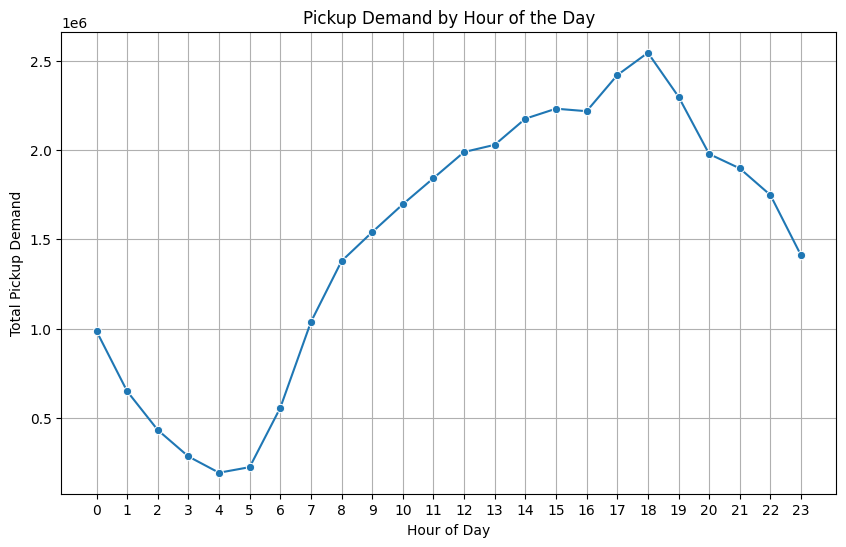

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregating data by hour of the day
pickup_demand_by_hour = pickup_demand_df.groupby("hour_of_day")["trip_count"].sum().reset_index()

# Create a line plot to show pickup demand over the hours of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x="hour_of_day", y="trip_count", data=pickup_demand_by_hour, marker="o")
plt.title("Pickup Demand by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Pickup Demand")
plt.xticks(range(24))  # Ensure we have 24 hours on x-axis
plt.grid(True)
plt.show()


<ipython-input-32-d1d67c8d2573>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




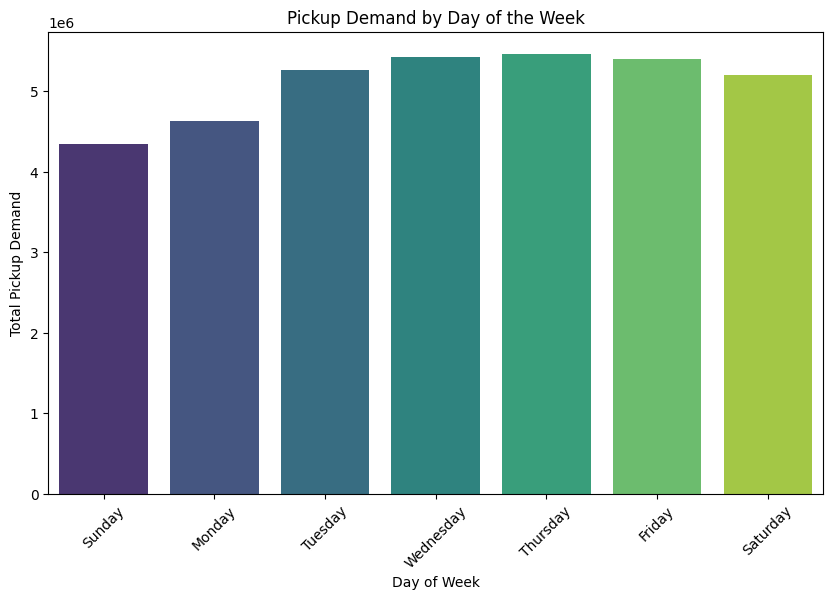

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Map day of the week numbers (1 = Sunday, 7 = Saturday) to day names
day_map = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
pickup_demand_df['day_name'] = pickup_demand_df['day_of_week'].map(day_map)

# Aggregating data by day of the week (using day names)
pickup_demand_by_day = pickup_demand_df.groupby("day_name")["trip_count"].sum().reset_index()

# Sort by day of the week to maintain the correct order (Sunday first)
pickup_demand_by_day['day_name'] = pd.Categorical(pickup_demand_by_day['day_name'], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
pickup_demand_by_day = pickup_demand_by_day.sort_values("day_name")

# Create a bar plot to show pickup demand by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x="day_name", y="trip_count", data=pickup_demand_by_day, palette="viridis")
plt.title("Pickup Demand by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Pickup Demand")
plt.xticks(rotation=45)  # Rotate the labels for better visibility
plt.show()


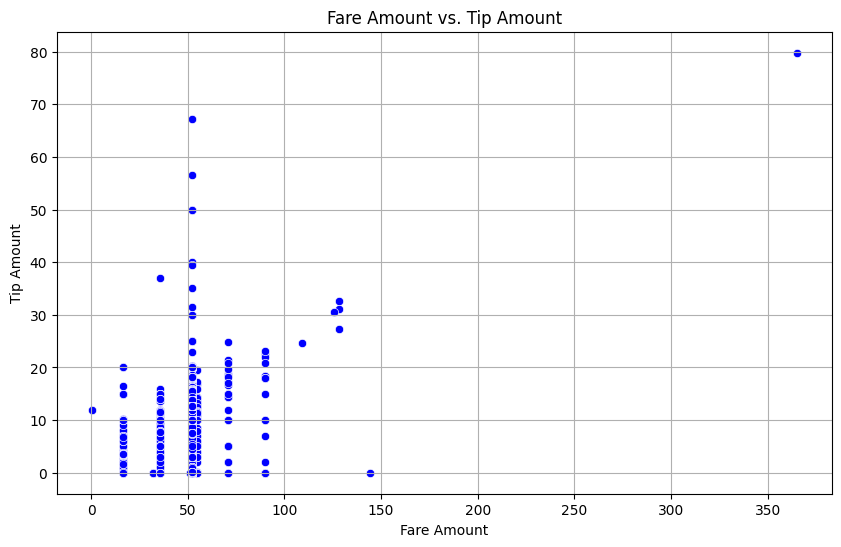

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="fare_amount", y="tip_amount", data=fare_tip_df, color="blue")
plt.title("Fare Amount vs. Tip Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Tip Amount")
plt.grid(True)
plt.show()


In [24]:
import plotly.express as px
import pandas as pd


In [31]:
# Create a dictionary to map numbers (1-7) to day names (starting with Sunday)
day_name_map = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

# Map the 'day_of_week' column in the dataframe to the corresponding day names
pickup_demand_df['day_name'] = pickup_demand_df['day_of_week'].map(day_name_map)

# Now, update the pivot table for heatmap
pickup_demand_pivot = pickup_demand_df.pivot_table(index='day_name', columns='hour_of_day', values='trip_count')

# Create the interactive heatmap
import plotly.express as px

fig_pickup_demand = px.imshow(
    pickup_demand_pivot,
    labels=dict(x="Hour of Day", y="Day of Week", color="Total Pickups"),
    title="Interactive Pickup Demand by Hour and Day of Week",
    color_continuous_scale='YlGnBu'
)

fig_pickup_demand.update_layout(
    xaxis_title="Hour of Day",
    yaxis_title="Day of Week",
    coloraxis_colorbar_title="Total Pickups"
)

# Show the interactive plot
fig_pickup_demand.show()


In [26]:
# Assuming 'fare_tip_df' contains the required columns: 'fare_amount', 'tip_amount'

# Create an interactive scatter plot for Fare vs. Tip Amount
fig_fare_tip = px.scatter(
    fare_tip_df,
    x="fare_amount",
    y="tip_amount",
    title="Interactive Fare Amount vs. Tip Amount",
    labels={"fare_amount": "Fare Amount", "tip_amount": "Tip Amount"},
    hover_data=["fare_amount", "tip_amount"]
)

# Show the interactive plot
fig_fare_tip.show()


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Load the dataset (replace with your actual path or DataFrame name if already loaded)
df = pd.read_csv("Fare and Tip Relationships.csv")

# Keep only relevant columns
df_model = df[['fare_amount', 'trip_distance', 'tip_amount']]

# Drop rows with missing or invalid values
df_model = df_model.dropna()
df_model = df_model[(df_model['fare_amount'] > 0) & (df_model['trip_distance'] > 0)]

# Features and target
X = df_model[['fare_amount', 'trip_distance']]
y = df_model['tip_amount']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

# Optional: Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df)

Root Mean Squared Error (RMSE): 3.1985121633517197
R-squared: 0.5974437357573827
         Feature  Coefficient
0    fare_amount     0.202338
1  trip_distance     0.025957
